In [1]:
# Importing some important librarys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# inmporting models for the machine learning

from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Quick Data Exploration

In [4]:
train_data.shape

(614, 13)

In [5]:
test_data.shape

(367, 12)

In [6]:
train_data.head(10)

# We got some categorical data, and it's a binary classification (Yes, NO)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [7]:
# Describe the numerical data

train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
train_data.info()

# We have missing data , we will handle them as we go

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


# Distribution Analysis

The percentage of Y class : 69.0
The percentage of N class : 31.0


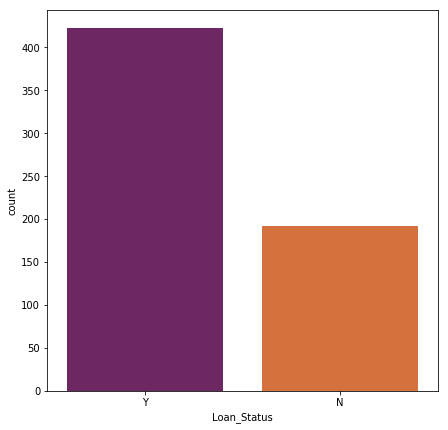

In [9]:
# let's look at the target percentage

plt.figure(figsize=(7,7))
sns.set_palette('GnBu_d')
sns.countplot(train_data['Loan_Status'], palette='inferno');

print('The percentage of Y class :', round((train_data['Loan_Status'].value_counts()[0] / len(train_data))*100))
print('The percentage of N class :', round((train_data['Loan_Status'].value_counts()[1] / len(train_data))*100))

# We can consider it as imbalanced data, but for now i will not

# Distribution Analysis on Numerical Features

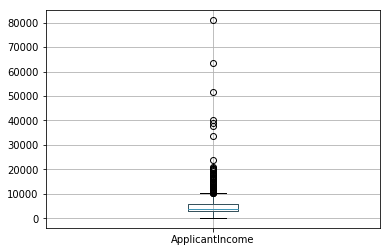

In [10]:
train_data.boxplot('ApplicantIncome');

This confirms the presence of a lot of outliers/extreme values. Let us
segregate them by Credit_History and Loan Status

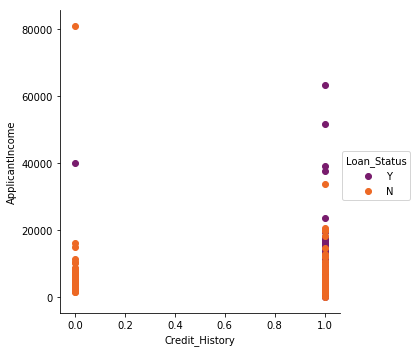

In [11]:
sns.set_palette('GnBu_d')
sns.FacetGrid(train_data, hue='Loan_Status', palette='inferno', size=5)\
.map(plt.scatter, 'Credit_History', 'ApplicantIncome')\
.add_legend();
plt.show()

In the above, we tried to know whether we can segregate the Loan Status based
on Applicant Income and Credit_History. Now, we can say to some extent that
Applicant income which is less than 20,000 and Credit History which is 0 can be
segregated as NO for Loan_Status.

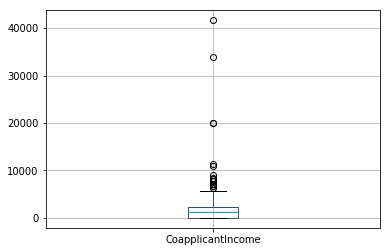

In [12]:
train_data.boxplot('CoapplicantIncome');

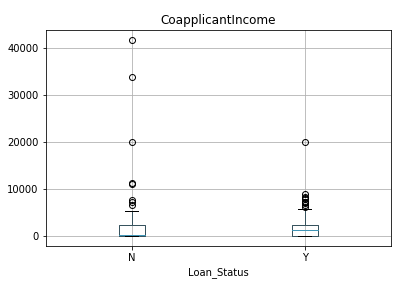

In [13]:
train_data.boxplot(column='CoapplicantIncome', by= 'Loan_Status')
plt.suptitle(" ");

We can see that when we get a low median in CoapplicantIncome we got Loan_Status = N, Hence CoapplicantIncome is a good feature

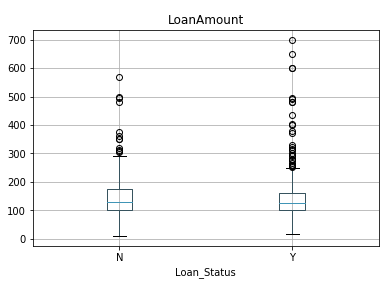

In [14]:
train_data.boxplot('LoanAmount', by='Loan_Status')
plt.suptitle(" ");

In [15]:
train_data.groupby('Loan_Status').median() # median because Not affected with outliers

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,3833.5,268.0,129.0,360.0,1.0
Y,3812.5,1239.5,126.0,360.0,1.0


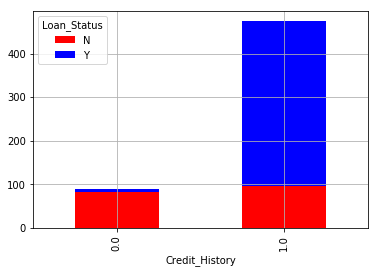

In [16]:
# Credit_History

grid = pd.crosstab(train_data['Credit_History'], train_data['Loan_Status'])
grid.plot(kind='bar', stacked=True, color=['red','blue'], grid=True);

Credit_History is an important feature because from the graph above we can deduce that customers with Credit_History = 0, are likely not to be eligble for a loan. while customers with Credit_History = 1, haave better chance in getting a loan. 

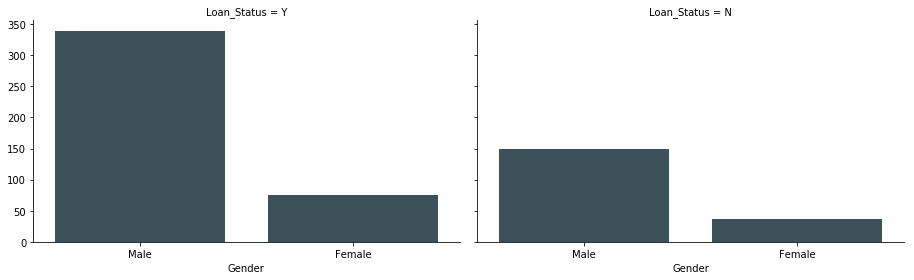

In [17]:
# Gender

grid = sns.FacetGrid(train_data,col='Loan_Status', size=4, aspect=1.6)
grid.map(sns.countplot, 'Gender');

From the graph, this's not an important feature. most male and female got loan.

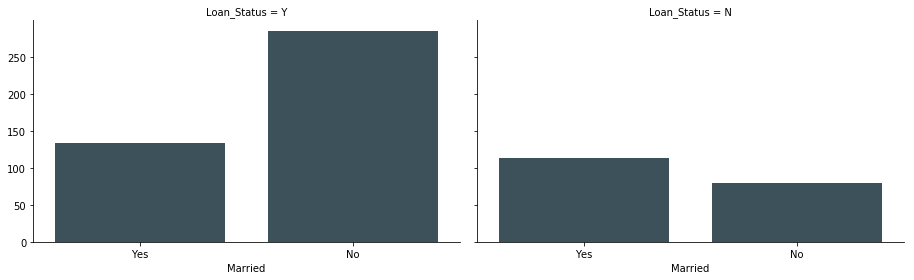

In [18]:
# Married

grid = sns.FacetGrid(train_data,col='Loan_Status', size=4, aspect=1.6)
grid.map(sns.countplot, 'Married');


This is a good feature. Most people who didn't get married did get a loan, if you are not married then you have better chance to get a loan.


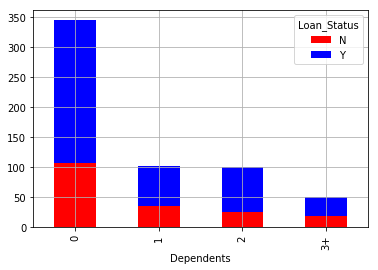

In [19]:
# Dependents

grid = pd.crosstab(train_data['Dependents'], train_data['Loan_Status'])
grid.plot(kind='bar', stacked=True, color=['red','blue'], grid=True);

the customers with 0 Dependents have higher chance of getting loan

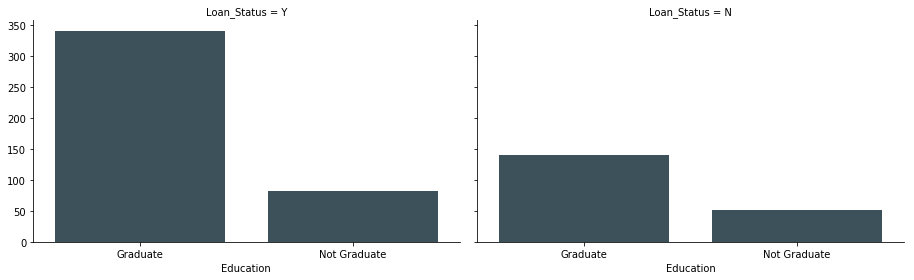

In [20]:
# Education

grid = sns.FacetGrid(train_data,col='Loan_Status', size=4, aspect=1.6)
grid.map(sns.countplot, 'Education');

If you are graduated or not, you will get almost the same chance to get a loan (No pattern)
Here you can see that most of the customers who are graduate get a loan
on the other hand, most of the customerrs who did't graduate also got a loan, but with less percentage from people who graduated

Hence, this is not important feature.

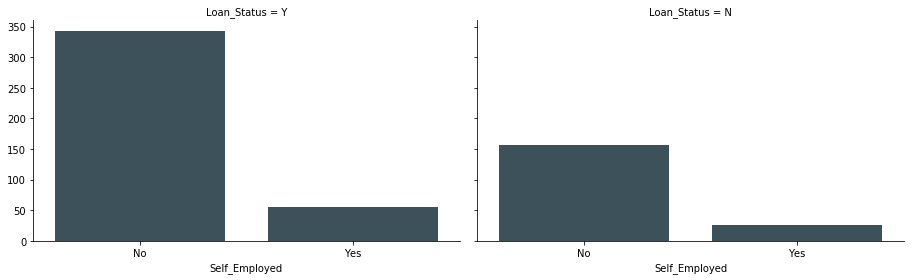

In [21]:
# Self_Employed

grid = sns.FacetGrid(train_data,col='Loan_Status', size=4, aspect=1.6)
grid.map(sns.countplot, 'Self_Employed');

There is no pattern same as Education.

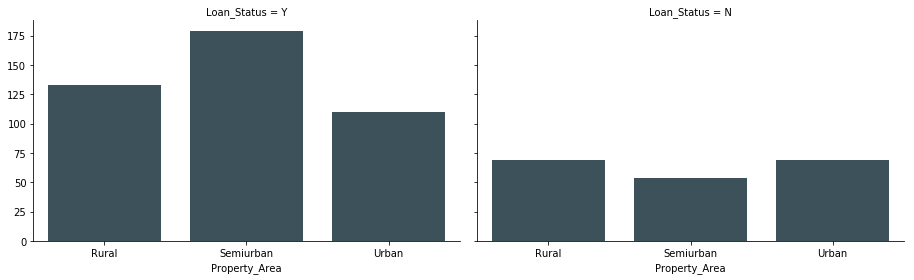

In [22]:
# Property_Area

grid = sns.FacetGrid(train_data,col='Loan_Status', size=4, aspect=1.6)
grid.map(sns.countplot, 'Property_Area');

The percentage of people who are in the Semiurban Area got higher chanche to get loan than other Area. Also, people in the Rural has a percentage higher than the Urban Area to get a loan.

# Data Cleaning and Structuring

### Check Missing Values in the Dataset
Let us look at missing values in all the variables because most of the models
don’t work with missing data and even if they do, imputing them helps more
often than not. So, let us check the number of nulls / NaNs in the dataset

In [23]:
train = train_data

In [24]:
train.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
dtype: int64

In [25]:
# cat_data
# we are filling every column with its own most frequent value(mode).

train['Gender'].fillna(train['Gender'].mode()[0], inplace= True)
train['Married'].fillna(train['Married'].mode()[0], inplace= True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace= True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace= True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace= True)
train.isnull().sum().any() # no more missing data

True

In [26]:
# num_data
# fill every missing value with their median value in the same column

train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace= True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace= True)

In [27]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Treat Extreme Values in Distribution (Outliers) of LoanAmount and ApplicantIncome
Let’s analyze LoanAmount first. Since the extreme values are practically
possible, i.e. some people might apply for high value loans due to specific
needs. So instead of treating them as outliers, let’s try a log transformation tonullify their effect:

In [28]:
#LoanAmount_log = np.log(train['LoanAmount']) # this will remove the skewness in LoanAmount

In [29]:
#train['LoanAmount'].hist(bins=20);

In [30]:
#sns.distplot(LoanAmount_log);

Now the distribution looks much closer to normal and effect of extreme
values has been significantly subsided.
Coming to ApplicantIncome. One intuition can be that some applicants have
lower income but strong support Co-applicants. So it might be a good idea to
combine both incomes as total income and take a log transformation of the
same.

In [31]:
#TotalIncome = train['ApplicantIncome'] + train['CoapplicantIncome']
#TotalIncome_log = np.log(TotalIncome)
#sns.distplot(TotalIncome_log);


Now we see that the distribution is much better than before.

## Building a Predictive Model in Python
### Categorical Columns
As our target variable is Loan_Status. We are storing it in a variable called y. But
before doing all these we are dropping LOAN_ID column in the train data sets. Here it goes.

In [32]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [33]:
train = train.drop('Loan_ID', axis=1) # droping Loan_ID for the training file
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [34]:
x = train.drop('Loan_Status', axis=1)
y = train.Loan_Status # Our target variable

In [35]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [36]:
y.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [37]:
x = pd.get_dummies(x) # converting the categorical variables to numerical
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


[0.18136242 0.12811495 0.17432632 0.04432891 0.27190107 0.01100875
 0.01181751 0.01053874 0.00892761 0.02158369 0.01719261 0.01325635
 0.01369973 0.01256907 0.01129546 0.01124043 0.01285826 0.01151679
 0.01933903 0.0131223 ]


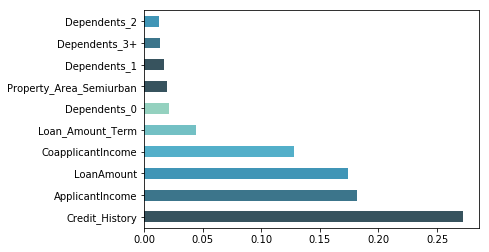

In [38]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [39]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features


                      Specs         Score
1         CoapplicantIncome  11342.041603
0           ApplicantIncome     93.904964
2                LoanAmount     32.821655
4            Credit_History     26.005877
18  Property_Area_Semiurban      7.103093
17      Property_Area_Rural      4.410584
3          Loan_Amount_Term      3.778554
14   Education_Not Graduate      3.540502
7                Married_No      3.355645
11             Dependents_2      1.996446


In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# here we are still working on the training data by spliting it into 4 data sets so that our model can work best on it without overfitting.

### Finding the best model for our dataset using Cross Validation
we are employing 6 classification techniques to know which one gives the highest accuracy

LR: 0.804348 (0.051444)
LDA: 0.804348 (0.051444)
KNN: 0.647826 (0.066509)
DTC: 0.691304 (0.062856)
GNB: 0.797826 (0.048659)
SVM: 0.673913 (0.064489)
RF: 0.745652 (0.041304)


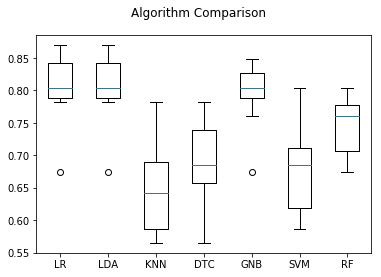

In [41]:
# Compare Algorithms

from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# prepare models

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))

# evaluate each model in turn

results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison

fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
plt.savefig ('Algorithm Comparison')
pyplot.show()

In [42]:
classifier = []
classifier.append(("LogisticReg", LogisticRegression(solver='liblinear', multi_class='ovr')))
classifier.append(("DecisionTree", DecisionTreeClassifier(criterion = 'entropy')))
classifier.append(("KNN", KNeighborsClassifier()))
classifier.append(("KernelSVM", SVC(gamma='auto')))
classifier.append(("NaiveBayes", GaussianNB()))
classifier.append(("RandomForest", RandomForestClassifier()))

# trying to get the best model techniques for the problem
seed = 0
results = []
names = []
for name, model in classifier:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LogisticReg: 0.804348 (0.051444)
DecisionTree: 0.702174 (0.063043)
KNN: 0.647826 (0.066509)
KernelSVM: 0.673913 (0.064489)
NaiveBayes: 0.797826 (0.048659)
RandomForest: 0.743478 (0.043260)


#### From the output of our modelling, Logistic Regression seems to be the best with approximately 80% accuracy and approximately 5% variance. Hence, we are applying it to the datas (train and test).

## Application of the Model to the Train Data

In [43]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
y_pred = logreg.predict(x_test) # This is the equation to solve our problem. We make Y the subject here, thus, y = model/x
y_pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N'],
      dtype=object)

In [45]:
y_prob = logreg.predict_proba(x_test)[:,1]
y_prob

array([0.84077238, 0.83207764, 0.71614813, 0.77967966, 0.8835963 ,
       0.09517155, 0.85193164, 0.79030421, 0.11644532, 0.84102968,
       0.83554499, 0.84289891, 0.80650119, 0.84683685, 0.87991611,
       0.7757236 , 0.66377002, 0.72756569, 0.75453771, 0.09529706,
       0.14486892, 0.84611712, 0.7884598 , 0.7580566 , 0.7526228 ,
       0.80033155, 0.76658769, 0.81044763, 0.3046633 , 0.2114153 ,
       0.85828395, 0.62208197, 0.73641592, 0.73551409, 0.83923052,
       0.13649407, 0.83252276, 0.56362864, 0.87008546, 0.83011678,
       0.75923377, 0.16683819, 0.8816848 , 0.63656645, 0.8401819 ,
       0.6456827 , 0.84105708, 0.83185205, 0.70078907, 0.67101838,
       0.85286943, 0.77741451, 0.64343994, 0.68645545, 0.73074228,
       0.8086993 , 0.79247525, 0.60021489, 0.80900144, 0.71189991,
       0.12194862, 0.81983685, 0.6798303 , 0.1446375 , 0.88915057,
       0.6423183 , 0.82637437, 0.80387602, 0.71216588, 0.72063558,
       0.64903511, 0.86097542, 0.67859853, 0.72320135, 0.85203

In [46]:
cm = confusion_matrix(y_test, y_pred)
print(cm) # the sum of all elements in cm = len(y_pred)

[[ 20  23]
 [  2 109]]


In [47]:
pd.DataFrame(cm)

,0,1
0,20,23
1,2,109


In [48]:
accuracy_score = accuracy_score(y_test, y_pred)
print(accuracy_score)

0.8376623376623377


In [49]:
report = classification_report(y_test, y_pred)
print(report)

             precision    recall  f1-score   support

          N       0.91      0.47      0.62        43
          Y       0.83      0.98      0.90       111

avg / total       0.85      0.84      0.82       154



In [50]:
target_values = {'Y':1, 'N':0}
y_test_1_0 = y_test.map(target_values)
#y_test_1_0

In [51]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test_1_0, y_prob)

In [52]:
roc_auc = roc_auc_score(y_test_1_0, y_prob)
roc_auc

0.8194007961449823

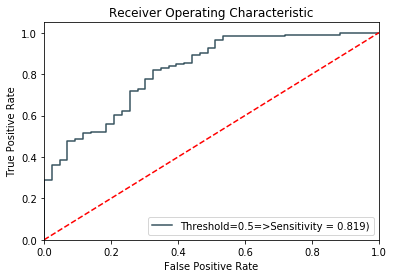

In [53]:
import matplotlib.pyplot as plt 
plt.figure () 
plt.plot (fpr, tpr, label = 'Threshold=0.5=>Sensitivity = %0.3f)' % roc_auc)
plt.plot ([0, 1], [0, 1],'r--') 
plt.xlim ([0.0, 1.0]) 
plt.ylim ([0.0, 1.05]) 
plt.xlabel ('False Positive Rate') 
plt.ylabel ('True Positive Rate')
plt.title ('Receiver Operating Characteristic')
plt.legend (loc = "lower right")
plt.savefig ('ROC_1')
plt.show ()

## Application of the Model to the Test Data
Here, we apply the model to the test data and find the predictive values. Before we can do that, we need to clean the data the way we did to the train data sets.

In [54]:
test_data.shape

(367, 12)

In [55]:
test_data.shape

(367, 12)

In [56]:
test_data.isnull().sum().sort_values(ascending=False)

Credit_History       29
Self_Employed        23
Gender               11
Dependents           10
Loan_Amount_Term      6
LoanAmount            5
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Married               0
Loan_ID               0
dtype: int64

In [57]:
test = test_data.drop('Loan_ID', axis=1)

In [58]:
# Removing the null in the category features and filing it with mode

test['Gender'].fillna(test['Gender'].mode()[0], inplace= True)
test['Married'].fillna(test['Married'].mode()[0], inplace= True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace= True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace= True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace= True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace= True)

In [59]:
# Removing the null values from the numeric features and filling it with the mean

test['LoanAmount'].fillna(test['LoanAmount'].mean(), inplace= True)

In [60]:
test.isnull().sum().any()

False

In [61]:
test = pd.get_dummies(test) # we convert the test to numeric values for the model to be able to read it.

In [62]:
test_pred = logreg.predict(test) # this is the equation to solve the problem, and we are making test (our targeted variable) the subject of formulae
test_pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [63]:
Result = pd.DataFrame()
Result['Loan_ID'] = test_data['Loan_ID']
Result['Loan_Status'] = test_pred.reshape(test_pred.shape[0])

## The Automated Outcome

In [64]:
Result.head(10)

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
5,LP001054,Y
6,LP001055,Y
7,LP001056,N
8,LP001059,Y
9,LP001067,Y


## Saving the predicted Result in a CSV File

In [65]:
Result.to_csv('Automated_Outcome.csv', index=False)